# Определение перспективного тарифа для телеком-компании

**Описание проекта**


Компании «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Первое знакомство с данными

Импортируем необходимые для анализа библиотеки.

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Первыи посмотрим файл с данными о звонках.

In [2]:
calls = pd.read_csv('/datasets/calls.csv') #открываем файл

In [3]:
display(calls.head()) # посмотрим первые 5 строк

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info() # просмотр информации о файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls.duplicated().sum() # подсчет дублирующихся строк

0

В файле с информацией о звонках 4 столбца. Тип данных в двух столбцах - object, в одном -float64 и еще в одном - int64. 

В соответствии с документацией в файле хранятся следующие данные:
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

В столбце с датой стоит объект object. Этот тип данный далее нужно будет изменить на тип datetime64, чтобы можно было делать различные преобразования с датой.

На первый взгляд пропусков в данных нет (во всех столбцах одинаковое количество значений). Дублирующихся строк тоже нет.

Следующим изучим файл с данными по интернет трафику

In [6]:
internet = pd.read_csv('/datasets/internet.csv') #открываем файл

In [7]:
display(internet.head()) # посмотрим первые 5 строк

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
internet.info() # просмотр информации о файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
internet.duplicated().sum() # подсчет дублирующихся строк

0

В файле 5 столбцов. На первый взгляд пропусков нет (во всех столбцах одинаковое количество значений).

В соответствии с документацией в файле хранятся следующие данные:
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Тип данных в двух столбцах - object, в одном -float64 и еще в одном - int64. В столбце с датой требуется изменить тип на datetime64

Дубликатов в таблице нет.

Далее посмотрим информацию в файле с сообщениями.

In [10]:
messages = pd.read_csv('/datasets/messages.csv') #открываем файл

In [11]:
display(messages.head()) # посмотрим первые 5 строк

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
messages.info() # просмотр информации о файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
messages.duplicated().sum() # подсчет дублирующихся строк

0

В файле 3 столбца. В соответствии с документацией в них хранится информация о:
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

В двух столбцах тип данных - object и в одном - int64. Опять в графе с датой указан не тот тип данных.

Дубликатов строк нет (проверяем методом duplicated().sum()). Количество значений по всем столбцам одинаковое, что значит, что пропусков нет. 

Посмотрим какая информация лежит в файле с тарифами:

In [14]:
tariffs = pd.read_csv('/datasets/tariffs.csv') #открываем файл

In [15]:
display(tariffs.head()) # посмотрим первые 5 строк

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
tariffs.info() # просмотр информации о файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В файле всего 2 строки с данными по тарифам. 8 столбцов:
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


Пропусков и дубликатов нет.

Последним посмотрим файл с данными о пользователях.

In [17]:
users = pd.read_csv('/datasets/users.csv') #открываем файл

In [18]:
users.info() # просмотр информации о файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
users.duplicated().sum()

0

In [20]:
display(users['city'].sort_values().unique())

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

В таблице 8 столбцов:
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

В шести столбцах тип данных - object и в двух - int64. В таблице есть два столбца с датами и тип данных у них требуется поменять.  

В столбце с датой прекращения пользования тарифом есть пропущенные значения, но это объясняется тем, что на момент выгрузки данных тариф еще действовал.

**Вывод**

Мы посмотрели общую информацию о файлах. Пропусков и дубликатов, который могут исказить данные не обнаружили. Но есть неточность в отображении типа данных в столбцах с датами: нужно изменить тип object на datetime64.

Также можно отметить, что во всех таблицах кроме файла с данными о тарифах есть общий столбец user_id. Он нам пригодится для объединения таблиц.

## Подготовка данных

На этом этапе мы заменим тип данных в столбце с датой, затем в каждую таблицу внесем дополнительны столбик с месяцем. Поскольку данные выгружены только за один год, то при анализе можно ограничится просто месяцем.

Затем мы объединим данные в общую таблицу, откинув лишние столбцы. И наконец посчитаем выручку по каждому пользователю за месяц.

### Предобработка данных. 

Последовательно в таблицах с данными о звонках, интернет трафике и сообщениях приведем дату к нужному типу данных и сказу добавим столбец с указанием месяца в каждую строку.

In [21]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') # приведение даты к формату datetime64

In [22]:
calls['month'] = calls['call_date'].dt.month # в отдельный столбик вносим номер месяца

In [23]:
display(calls.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [24]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


In [25]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d') # приведение даты к формату datetime64

In [26]:
messages['month'] = messages['message_date'].dt.month # в отдельный столбик вносим номер месяца

In [27]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


In [28]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d') # приведение даты к формату datetime64

In [29]:
internet['month'] = internet['session_date'].dt.month # в отдельный столбик вносим номер месяца

In [30]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


In [31]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') # приведение даты к формату datetime64

In [32]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d') # приведение даты к формату datetime64

Тип данных в столбцах с датой замени. Месяц добавили. 

Для анализа нам нужно округлить данные о продолжительности звонков до минуты, но в большую сторону. А информацию об интернет трафике перевести в гигабайты и тоже округлить в большую сторону, но мы это сделаем после того, как сгруппируем данные по трафику по месяцам.

Для этой задачи напишем функцию: одна будет работать со звонками.

In [33]:
def roundup_minut(i): # функция для округления в большую сторону длительности звонков
    return int(math.ceil(i))
calls['duration'] = calls['duration'].apply(roundup_minut)

In [34]:
display(calls.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [35]:
display(calls.head())


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Округление в большую сторону прошло успешно. Теперь приступим к объединению таблиц.

### Объединение данных

Проведем группировку по месяцу и идентификатору пользователя таблицу со звонками и посчитаем помесячную сумму звонков по каждому пользователю. 

In [36]:
calls_group = calls.groupby(['user_id', 'month'])['duration'].sum() #группировка по двум столбцам и расчет суммы по третьему
              

Аналогично поступим с данными по интернет-трафику и сообщениям.

In [37]:
internet_group = internet.groupby(['user_id', 'month'])['mb_used'].sum() #группировка по двум столбцам и расчет суммы по третьему

In [38]:
messages_group = messages.groupby(['user_id', 'month'])['id'].count() #группировка по двум столбцам и расчет количества значений по третьему

Объединим две таблицы (звонки и интернет) в одну. Объединять будем по столбцам "месяц" и "идентификатор пользователя". Для того, чтобы в общую таблицу вошли все строки, как из первой, так и из второй таблицы используем параметр how = 'outer'.

In [39]:
summary_table = pd.merge(calls_group, internet_group ,on = ('user_id', 'month'), how = 'outer')

Теперь аналогичным способом объединим полученную таблицу с таблицой с данными о сообщениях. И опять используем параметр how = 'outer'.

In [40]:
summary_table = pd.merge(summary_table, messages_group, on = ('user_id', 'month') , how = 'outer')

In [41]:
summary_table.reset_index(inplace=True) # сбрасываем индекы

In [42]:
display(summary_table.head())

,user_id,month,duration,mb_used,id
0,1000,5,159.0,2253.49,22.0
1,1000,6,172.0,23233.77,60.0
2,1000,7,340.0,14003.64,75.0
3,1000,8,408.0,14055.93,81.0
4,1000,9,466.0,14568.91,57.0


Последней присоединим к общей таблице данные о пользователях. В этот раз объединять будем только по столбцу с идентификатором пользователя, и опять возьмем how = 'outer' .

In [43]:
summary_table = users.merge(summary_table, on=['user_id'], how = 'outer')


Удалим лишние столбцы:

In [44]:
summary_table = summary_table.drop(columns = ['age', 'churn_date', 'first_name', 'last_name', 'reg_date'])

In [45]:
display(summary_table.head()) #просмотр первых 5 строк

,user_id,city,tariff,month,duration,mb_used,id
0,1000,Краснодар,ultra,5.0,159.0,2253.49,22.0
1,1000,Краснодар,ultra,6.0,172.0,23233.77,60.0
2,1000,Краснодар,ultra,7.0,340.0,14003.64,75.0
3,1000,Краснодар,ultra,8.0,408.0,14055.93,81.0
4,1000,Краснодар,ultra,9.0,466.0,14568.91,57.0


Проверим, что количество уникальных значений пользователей у нас не изменилось по сравнению с первоначальными данными.

In [46]:
display(len(users['user_id'].unique())) 
display(len(summary_table['user_id'].unique()))

500

500

В полученной таблице есть пропущенные значения. Они означают, что пользователь не пользовался теми или иными опциями, поэтому спокойно можем заменить пропуски на 0 методом fillna(). И пожалуй стоит поменять название в столбце с сообщениями.

In [47]:
summary_table.rename(columns = {'id': 'messages'}, inplace = True) # переименование столбца

In [48]:
summary_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
user_id     3216 non-null int64
city        3216 non-null object
tariff      3216 non-null object
month       3214 non-null float64
duration    3174 non-null float64
mb_used     3203 non-null float64
messages    2717 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 201.0+ KB


In [49]:
summary_table = summary_table.fillna(0) #замена пропусков на 0

Теперь пришло время для округления суммы интернет трафика за месяц в большую сторону. Для этого используем функцию, аналогичную той, что была у нас для округления времени звонков.

In [50]:
def roundup_gb(i): # функция для перевода мегабайт в гигабайти и округление в большую сторону
    return int(math.ceil(i/1024))
summary_table['gb_used'] = summary_table['mb_used'].apply(roundup_gb)

In [51]:
summary_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
user_id     3216 non-null int64
city        3216 non-null object
tariff      3216 non-null object
month       3216 non-null float64
duration    3216 non-null float64
mb_used     3216 non-null float64
messages    3216 non-null float64
gb_used     3216 non-null int64
dtypes: float64(4), int64(2), object(2)
memory usage: 226.1+ KB


In [52]:
display(summary_table.head(10))

,user_id,city,tariff,month,duration,mb_used,messages,gb_used
0,1000,Краснодар,ultra,5.0,159.0,2253.49,22.0,3
1,1000,Краснодар,ultra,6.0,172.0,23233.77,60.0,23
2,1000,Краснодар,ultra,7.0,340.0,14003.64,75.0,14
3,1000,Краснодар,ultra,8.0,408.0,14055.93,81.0,14
4,1000,Краснодар,ultra,9.0,466.0,14568.91,57.0,15
5,1000,Краснодар,ultra,10.0,350.0,14702.49,73.0,15
6,1000,Краснодар,ultra,11.0,338.0,14756.47,58.0,15
7,1000,Краснодар,ultra,12.0,333.0,9817.61,70.0,10
8,1001,Москва,smart,11.0,430.0,18429.34,0.0,18
9,1001,Москва,smart,12.0,414.0,14036.66,0.0,14


In [53]:
display(calls['duration'].sum())
display(summary_table['duration'].sum())

1450301

1450301.0

In [54]:
display(internet['mb_used'].sum())
display(summary_table['mb_used'].sum())

55305267.73

55305267.730000004

In [55]:
display(messages['user_id'].count())
display(summary_table['messages'].sum())

123036

123036.0

### Расчет выручки по каждому пользователю в месяц

Последне, что нам нужно сделать прежде, чем займемся анализом - это посчитать помесячную выручку с каждого пользователя. Для этого напишем две функции. Одна будет считать выручку по тарифу "смарт", а вторая по тарифу "ультра".

In [56]:
def revenue_smart(row): #функция для подсчета выручки по тарифу Смарт
   
    result = tariffs['rub_monthly_fee'][0]
    if 'smart' in row['tariff']:
        minutes = tariffs['minutes_included'][0]
        internet = tariffs['mb_per_month_included'][0]/1024
        messages = tariffs['messages_included'][0]
      
   
        
        if row['duration'] > minutes:
            result += (row['duration'] - minutes)*tariffs['rub_per_minute'][0]
           
            
        if row['gb_used'] > internet:
            result += (row['gb_used'] - internet)*tariffs['rub_per_gb'][0]
                          
        if row['messages'] > messages:
            result += (row['messages'] - messages)*tariffs['rub_per_message'][0]
            
        return result 
summary_table['revenue'] = summary_table.apply(revenue_smart, axis =1)

Сразу сохраним данные по тарифу в отдельную переменную, поскольку анализ нужно будет проводить сравнивая тарифы между собой, а с отдельными списками работать будет удобнее.

In [57]:
#tariff_smart = summary_table.loc[summary_table['tariff'] == 'smart'] и
tariff_smart = summary_table.loc[summary_table['tariff'] == 'smart']

In [58]:
display(tariff_smart.head())

,user_id,city,tariff,month,duration,mb_used,messages,gb_used,revenue
8,1001,Москва,smart,11.0,430.0,18429.34,0.0,18,1150.0
9,1001,Москва,smart,12.0,414.0,14036.66,0.0,14,550.0
10,1002,Стерлитамак,smart,6.0,117.0,10856.82,4.0,11,550.0
11,1002,Стерлитамак,smart,7.0,214.0,17580.10,11.0,18,1150.0
12,1002,Стерлитамак,smart,8.0,289.0,20319.26,13.0,20,1550.0


In [59]:
def revenue_ultra(row): #функция для подсчета выручки по тарифу Ультра
    
    result = tariffs['rub_monthly_fee'][1]
    if 'ultra' in row['tariff']:
        minutes = tariffs['minutes_included'][1]
        internet = tariffs['mb_per_month_included'][1]/1024
        messages = tariffs['messages_included'][1]
        
   
        
        if row['duration'] > minutes:
            result += (row['duration'] - minutes)*tariffs['rub_per_minute'][1]
           
            
        if row['gb_used'] > internet:
            result += (row['gb_used'] - internet)*tariffs['rub_per_gb'][1]
            
                         
        if row['messages'] > messages:
            result += (row['messages'] - messages)*tariffs['rub_per_message'][1]
            
        return result 
summary_table['revenue'] = summary_table.apply(revenue_ultra, axis = 1)


In [60]:
tariff_ultra = summary_table.loc[summary_table['tariff'] == 'ultra']

In [61]:
display(tariff_ultra.head())

,user_id,city,tariff,month,duration,mb_used,messages,gb_used,revenue
0,1000,Краснодар,ultra,5.0,159.0,2253.49,22.0,3,1950.0
1,1000,Краснодар,ultra,6.0,172.0,23233.77,60.0,23,1950.0
2,1000,Краснодар,ultra,7.0,340.0,14003.64,75.0,14,1950.0
3,1000,Краснодар,ultra,8.0,408.0,14055.93,81.0,14,1950.0
4,1000,Краснодар,ultra,9.0,466.0,14568.91,57.0,15,1950.0


Дополнительный столбик с выручкой по каждому месяцу и по каждому человеку мы сделали.

**Вывод**

На данном этапе работы:
- мы исправили проблемы в данных, которые обнаружили в первом разделе, а именно заменили тип данный в столбцах с датами.
- добавили столбец с номером месяца. Этот столбец нам был нужен для последующей группировки.
- сгруппировали данные по месяцу и идентификатору пользователя и объединили в одну таблицу.
- расчитали помесячную выручку по каждому пользователю.

## Анализ данных

Данные готовы к анализу.

Далее посчитаем среднее количество, дисперсию и стандартное отклонение по продолжительности звонка, интернет трафику, количеству сообщений и выручке. Расчет будем проводить для каждого тарифа отдельно.

Создадим сводные таблицы по каждому из тарифов и посчитаем среднее по каждому пользователю по четырем параметрам. Сначала для тарифа Смарт, а потом для тарифа Ультра. Среднюю округлим до сотых, чтобы легче было воспринимать данные.

In [62]:
tariff_smart_group = round(tariff_smart.pivot_table(index = 'user_id', values = ['duration', 'gb_used', 'messages', 'revenue'], aggfunc = 'mean'),2)
# создание сводной таблицы и расчет среднего в каждом из столбцов. данные округляем до сотых.

In [63]:
display(tariff_smart_group.head(5)) # просмотр первых 5 строк

,duration,gb_used,messages,revenue
user_id,,,,
1001,422.00,16.00,0.0,850.00
1002,216.71,16.71,10.0,1035.71
1005,550.42,8.58,46.0,827.00
1006,318.27,15.09,0.0,931.82
1007,486.56,14.89,25.0,913.44


Аналогично посчитаем средние значения по тарифу Ультра.

In [64]:
tariff_ultra_group = round(tariff_ultra.pivot_table(index = 'user_id', values = ['duration', 'gb_used', 'messages', 'revenue'], aggfunc = 'mean'),2)
# создание сводной таблицы и расчет среднего в каждом из столбцов. данные округляем до сотых.

In [65]:
display(tariff_ultra_group.head(5)) # просмотр первых 5 строк

,duration,gb_used,messages,revenue
user_id,,,,
1000,320.75,13.62,62.0,1950.0
1003,764.40,11.80,76.0,1950.0
1004,123.38,18.75,149.0,1950.0
1013,468.00,15.50,21.0,1950.0
1016,61.00,13.50,71.0,1950.0


По каждому столбцу (звонки, интернет, сообщения и выручка) последовательно расчитаем дисперсию, среднее, стандартное отклонение и опишем распределение значений. 

### Дисперсия

Для подсчета разброса значений вокруг среднего посчитаем дисперсию методом var(). Стоит учесть, что мы считаем дисперсию не по генеральной совокупности, а по выборке, поэтому методу var() передаем дополнительный параметр ddof=1.

- интернет трафик

In [66]:
variance_smart_gb = np.var(tariff_smart_group['gb_used'], ddof = 1) #расчет дисперсии интернет трафика по тарифу Смарт

In [67]:
display(variance_smart_gb)

12.984296761904762

In [68]:
variance_ultra_gb = np.var(tariff_ultra_group['gb_used'], ddof = 1) #расчет дисперсии интернет трафика по тарифу Ультра

In [69]:
display(variance_ultra_gb)

68.00157738980592

Величина дисперсий сильно различается

- продолжительность звонков

In [70]:
variance_smart_minut = np.var(tariff_smart_group['duration'], ddof = 1) #расчет дисперсии продолжительности звонков по тарифу Смарт

In [71]:
display(variance_smart_minut)

21475.776103034594

In [72]:
variance_ultra_minut = np.var(tariff_ultra_group['duration'], ddof = 1) #расчет дисперсии продолжительности звонков по тарифу Ультра

In [73]:
display(variance_ultra_minut)

80736.84591421185

Дисперсии для продолжительности звонков расчитаны

- количество сообщений

In [74]:
variance_smart_mess = np.var(tariff_smart_group['messages'], ddof = 1) #расчет дисперсии количества сообщений по тарифу Смарт

In [75]:
display(variance_smart_mess)

703.8835411298331

In [76]:
variance_ultra_mess = np.var(tariff_ultra_group['messages'], ddof = 1) #расчет дисперсии количества сообщений по тарифу Ультра

In [77]:
display(variance_ultra_mess)

2154.8960211862873

Дисперсии для данных о количестве сообщений посчитаны

- выручка

In [78]:
variance_smart_revenue = np.var(tariff_smart_group['revenue'], ddof = 1) #расчет дисперсии выручки по тарифу Смарт

In [79]:
display(variance_smart_revenue)

367944.2023551078

In [80]:
variance_ultra_revenue = np.var(tariff_ultra_group['revenue'], ddof = 1) #расчет дисперсии выручки по тарифу Ультра

In [81]:
display(variance_ultra_revenue)

88644.63312856884

Дисперсии по выручке посчитаны.

### Стандартное отклонение

Для всех ранее указанных столбцов расчитаем стандартное отклонение. Расчет будем проводить как и прежде попарно - сначала один столбец по одному и второму тарифу, потом следующий.

Поскольку у нас есть расчитанная дисперсия, то для расчета стандартного отклонения можно применить метод sqrt(). 

- интернет трафик

In [82]:
standart_deviation_smart_gb = np.sqrt(variance_smart_gb) # расчет стандартного отклонения на основе дисперсии

In [83]:
display(standart_deviation_smart_gb)

3.6033729701357258

In [84]:
standart_deviation_ultra_gb = np.sqrt(variance_ultra_gb) # расчет стандартного отклонения на основе дисперсии

In [85]:
display(standart_deviation_ultra_gb)

8.246306893986297

Стандартное отклонение показывает насколько значения в выборке отличаются от среднего. Чем меньше стандартное отклонение, тем более однородна выборка. В тарифе Ультра по параметру "интернет трафик" значения менее однородны, чем в тарифе Смарт

- продолжительность звонков

In [86]:
standart_deviation_smart_minut = np.sqrt(variance_smart_minut) # расчет стандартного отклонения на основе дисперсии

In [87]:
display(standart_deviation_smart_minut)

146.546156902986

In [88]:
standart_deviation_ultra_minut = np.sqrt(variance_ultra_minut) # расчет стандартного отклонения на основе дисперсии

In [89]:
display(standart_deviation_ultra_minut)

284.14229870649643

В тарифе Ультра по параметру "продолжительность разговора" значения менее однородны, чем в тарифе Смарт

- количество сообщений

Для разнобразия посчитаем страндартное отклонения методом std() с дополнительным параметром ddof=1, поскольку у нас выборка, а не генеральная совокупность.

In [90]:
standart_deviation_smart_mess = np.std(tariff_smart_group['messages'], ddof = 1) # расчет стандартного отклонения для выборки 

In [91]:
display(standart_deviation_smart_mess)

26.530803627667087

In [92]:
standart_deviation_ultra_mess = np.std(tariff_ultra_group['messages'], ddof = 1) # расчет стандартного отклонения для выбокри из генеральной совокупности

In [93]:
display(standart_deviation_ultra_mess)

46.42085760933642

В тарифе Ультра по параметру "количество сообщений" значения менее однородны, чем в тарифе Смарт

- выручка

In [94]:
standart_deviation_smart_revenue = np.std(tariff_smart_group['revenue'], ddof = 1) # расчет стандартного отклонения для выбокри из генеральной совокупности

In [95]:
display(standart_deviation_smart_revenue)

606.5840439338211

In [96]:
standart_deviation_ultra_revenue = np.std(tariff_ultra_group['revenue'], ddof = 1) # расчет стандартного отклонения для выбокри из генеральной совокупности

In [97]:
display(standart_deviation_ultra_revenue)

297.7324858468905

В тарифе Ультра по параметру "выручка" значения наоборот более однородны, чем в тарифе Смарт

Итак данные в тарифе Ультра менее однородны, чем в тарифе Смарт. Исключение - это столбец с выручкой. Смею предположить, что в тарифе Ультра больше пользователей укладывается в лимит тарифа и соответственно оплачивает только фиксированную сумму, что несколько выравнивает ряд значений.

### Среднее значение

Как и для предыдущих параметров рассчитаем среднее по каждому исследуемому столбцу по каждому из тарифов

- интернет трафик

In [98]:
smart_gb_mean = tariff_smart_group['gb_used'].mean() #среднее значение интернет трафика в тарифе Смарт

In [99]:
display(smart_gb_mean)

16.26222222222222

In [100]:
ultra_gb_mean = tariff_ultra_group['gb_used'].mean() #среднее значение интернет трафика в тарифе Ультра

In [101]:
display(ultra_gb_mean)

19.456778523489934

В среднем пользователи тарифа Ультра в выборке больше пользуются интернетом, чем в тарифе Смарт.

-продолжительность звонков

In [102]:
smart_minut_mean = tariff_smart_group['duration'].mean() #среднее значение продолжительности звонков в тарифе Смарт

In [103]:
display(smart_minut_mean)

418.43937321937324

In [104]:
ultra_minut_mean = tariff_ultra_group['duration'].mean() #среднее значение продолжительности звонков в тарифе Ультра

In [105]:
display(ultra_minut_mean)

524.2791946308726

Звонков в тарифе Ульта в среднем больше, чем в Смарте. 

- количество сообщений

In [106]:
smart_messages_mean = tariff_smart_group['messages'].mean() #среднее значение количества сообщений в тарифе Смарт

In [107]:
display(smart_messages_mean)

32.25988603988604

In [108]:
ultra_messages_mean = tariff_ultra_group['messages'].mean() #среднее значение количества сообщений в тарифе Ультра

In [109]:
display(ultra_messages_mean)

53.66805369127517

Среднее количество сообщений в тарифе Ультра больше, чем в тарифе Смарт.

- выручка

In [110]:
smart_revenue_mean = tariff_smart_group['revenue'].mean() #средняя выручка в тарифе Смарт

In [111]:
display(smart_revenue_mean)

1322.1945014245014

In [112]:
ultra_revenue_mean = tariff_ultra_group['revenue'].mean() #средняя выручка в тарифе Ультра

In [113]:
display(ultra_revenue_mean)

2085.5489261744965

Средняя выручка в тарифе Ультра больше, поскольку в этом тарифе, пользователям явно не хватает включенного в абонентскую плату интернета. Уточню что, в данном случае, мы говорим о средних величинах, а не о каждом пользователе в отдельности.

### Распределение 

Для большинства распределений верно правило трех стандартных отклонения (правило трех сигм), которое говорит о том, что практически все значения (около 99%) находятся в промежутке: среднее - 3 сигмы, среднее + 3 сигмы. Значения за пределами этого интервала называют выбросами. И с ними мы встречались при построении диаграммы размаха.

Для рачета распределения также по очереди посмотрим все столбцы таблиц по каждому тарифу.

- интернет трафик

In [114]:
interval_smart_gd = (smart_gb_mean - 3*standart_deviation_smart_gb), (smart_gb_mean + 3*standart_deviation_smart_gb)


In [115]:
display(interval_smart_gd)

(5.452103311815044, 27.072341132629397)

In [116]:
interval_ultra_gd = (ultra_gb_mean - 3*standart_deviation_ultra_gb), (ultra_gb_mean + 3*standart_deviation_ultra_gb)

In [117]:
display(interval_ultra_gd)

(-5.282142158468957, 44.195699205448825)

Поскольку интернет трафик, разговоры, сообщения и выручка не могут быть отрицательными, то сразу определим, что если диапазон значений попадает в зону ниже нуля, то за начало его принимаем ноль. Таким образом для тарифа Смарт большинство значений выборки лежат в диапазоне от 5,45 до 27,07, а для тарифа Ультра диапазон от 0 до 44,19

Построим гистограммы для интернет трафика для обоих тарифов. Границы корзин задалим вручную. Первая будет для тарифа Смарт, а вторая для Ультра.

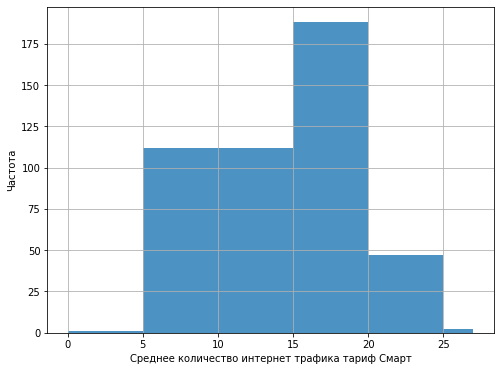

In [118]:
tariff_smart_group['gb_used'].hist(bins = [0, 5 , 15, 20, 25, 27], alpha = 0.8, figsize = (8, 6))
plt.xlabel('Среднее количество интернет трафика тариф Смарт')
plt.ylabel('Частота')
plt.show()

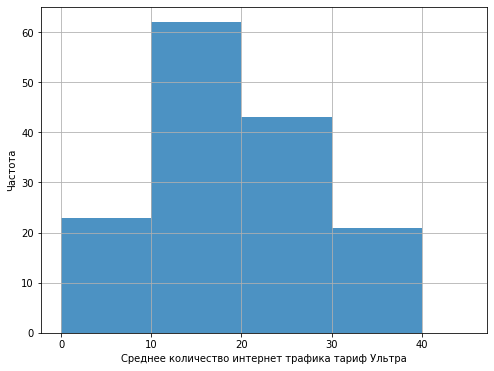

In [119]:
tariff_ultra_group['gb_used'].hist(bins = [0, 10 , 20, 30, 40, 45], alpha = 0.8, figsize = (8, 6))
plt.xlabel('Среднее количество интернет трафика тариф Ультра')
plt.ylabel('Частота')
plt.show()

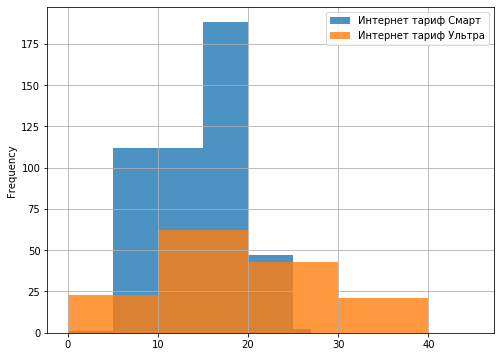

In [120]:
ax = tariff_smart_group['gb_used'].plot(kind = 'hist', y = 'Частота',bins = [0, 5 , 15, 20, 25, 27],\
                                        label = 'Интернет тариф Смарт',\
                                        alpha = 0.8,  figsize = (8,6), legend=True)

tariff_ultra_group['gb_used'].plot(kind = 'hist', y = 'Частота', bins = [0, 10 , 20, 30, 40, 45],\
                                   label ='Интернет тариф Ультра',\
                                   alpha = 0.8, ax=ax, grid = True, legend=True)

plt.show()

Гистограммы тарифа Смарт показывает нормальное распределение данных, а по тарифу Ультра есть небольшая скошенность вправо. Для проверки посчитаем медиану:

In [121]:
display(tariff_smart_group['gb_used'].median())


16.33

In [122]:
display(tariff_ultra_group['gb_used'].median())

18.75

В целом медианы тоже говорят о том, что распределение нормальное. 

- продолжительность разговора

In [123]:
interval_smart_minut = (smart_minut_mean - 3*standart_deviation_smart_minut), (smart_minut_mean + 3*standart_deviation_smart_minut)

In [124]:
display(interval_smart_minut)

(-21.1990974895848, 858.0778439283313)

In [125]:
interval_ultra_minut = (ultra_minut_mean - 3*standart_deviation_ultra_minut), (ultra_minut_mean + 3*standart_deviation_ultra_minut)

In [126]:
display(interval_ultra_minut)

(-328.1477014886168, 1376.706090750362)

Для тарифа Смарт большинство значений выборки лежат в диапазоне от 0 до 858.05, а для тарифа Ультра диапазон от 0 до 1376.98

Построим гистограммы для продолжительности звонков для обоих тарифов. Первая будет для тарифа Смарт, а вторая для Ультра.

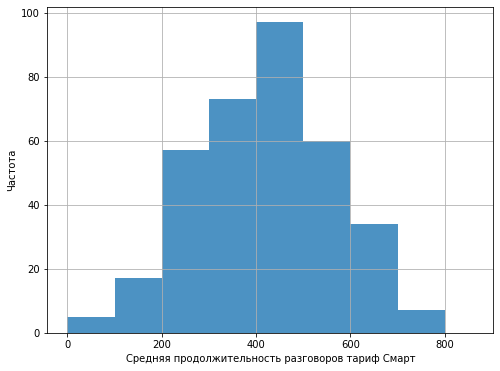

In [127]:
tariff_smart_group['duration'].hist(bins = [0, 100 , 200, 300, 400, 500, 600, 700, 800 , 860], alpha = 0.8, figsize = (8, 6))
plt.xlabel('Средняя продолжительность разговоров тариф Смарт')
plt.ylabel('Частота')
plt.show()

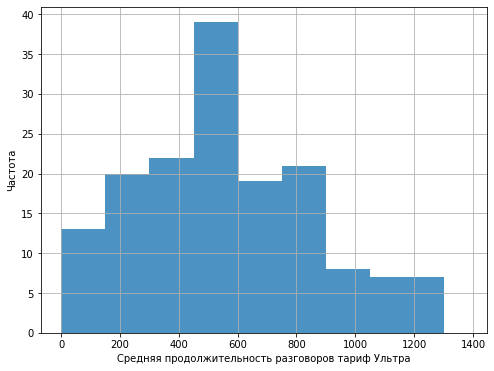

In [128]:
tariff_ultra_group['duration'].hist(bins = [0, 150 , 300, 450, 600, 750, 900, 1050, 1300 , 1380], alpha = 0.8, figsize = (8, 6))
plt.xlabel('Средняя продолжительность разговоров тариф Ультра')
plt.ylabel('Частота')
plt.show()

Распределение на гистограммах похоже на нормальное. Но для проверки посчитаем медианы.

In [129]:
display(tariff_smart_group['duration'].median())

424.88

In [130]:
display(tariff_ultra_group['duration'].median())

513.33

Медианы говорят о наличии незначительной скошенности наборов данных. В тарифе Смарт отрицательная скошенность, а у тарифа Ультра, наоборот положительная. Поскольку скошенность незначительная, распределение больше похоже на нормальное

- количество сообщений

In [131]:
interval_smart_mess = (smart_messages_mean - 3*standart_deviation_smart_mess), (smart_messages_mean + 3*standart_deviation_smart_mess)

In [132]:
display(interval_smart_mess)

(-47.33252484311522, 111.8522969228873)

In [133]:
interval_ultra_mess = (ultra_messages_mean - 3*standart_deviation_ultra_mess), (ultra_messages_mean + 3*standart_deviation_ultra_mess)

In [134]:
display(interval_ultra_mess)

(-85.5945191367341, 192.93062651928443)

Для тарифа Смарт большинство значений выборки лежат в диапазоне от 0 до 111.93, а для тарифа Ультра диапазон от 0 до 192,93

Построим гистограммы для количества сообщений для обоих тарифов. Первая будет для тарифа Смарт, а вторая для Ультра. Поскольку количество сообщений - это величина дискретная, то мы не будем задавать границы корзин.

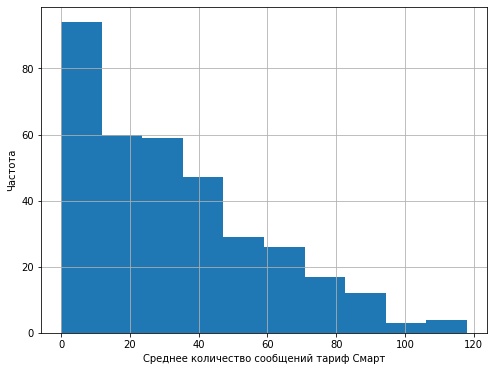

In [135]:
tariff_smart_group['messages'].hist(bins = 10, figsize = (8, 6))
plt.xlabel('Среднее количество сообщений тариф Смарт')
plt.ylabel('Частота')
plt.show()

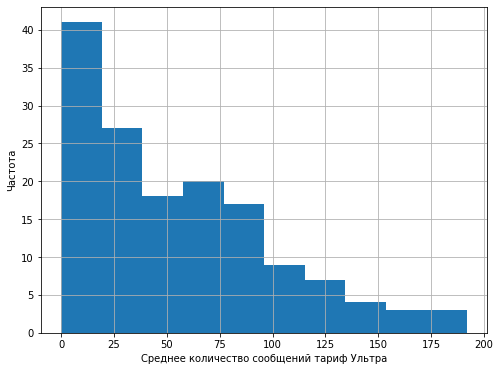

In [136]:
tariff_ultra_group['messages'].hist(bins = 10, figsize = (8, 6))
plt.xlabel('Среднее количество сообщений тариф Ультра')
plt.ylabel('Частота')
plt.show()

Данные распределены с явным смещением вправо.

In [137]:
display(tariff_smart_group['messages'].median())

27.5

In [138]:
display(tariff_ultra_group['messages'].median())

45.0

Медианы подтверждают положительную скошенность наборов данных.

- выручка

In [139]:
interval_smart_revenue = (smart_revenue_mean - 3*standart_deviation_smart_revenue), (smart_revenue_mean + 3*standart_deviation_smart_revenue)

In [140]:
display(interval_smart_revenue)

(-497.5576303769619, 3141.9466332259644)

In [141]:
interval_ultra_revenue = (ultra_revenue_mean - 3*standart_deviation_ultra_revenue), (ultra_revenue_mean + 3*standart_deviation_ultra_revenue)

In [142]:
display(interval_ultra_revenue)

(1192.351468633825, 2978.746383715168)

Для тарифа Смарт большинство значений выборки лежат в диапазоне от 550 до 3141,94, а для тарифа Ультра диапазон от 1950 до 2978,74. Поскольку абонентская плата взымается вне зависимости от того, пользовался человек связью или нет, то минимальными значениями в интервалах, будет значение этой самой абонентской платы.

Построим гистограммы для выручки для обоих тарифов. Первая будет для тарифа Смарт, а вторая для Ультра.

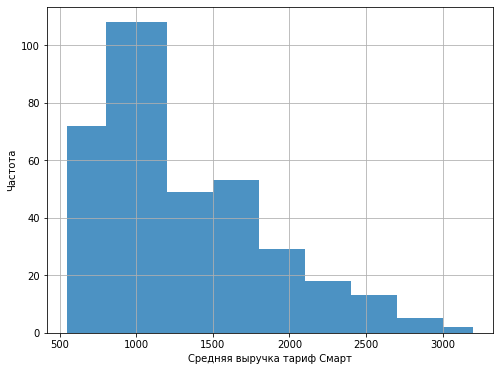

In [143]:
tariff_smart_group['revenue'].hist(bins = [550, 800 , 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3200], alpha = 0.8, figsize = (8, 6))
plt.xlabel('Средняя выручка тариф Смарт')
plt.ylabel('Частота')
plt.show()

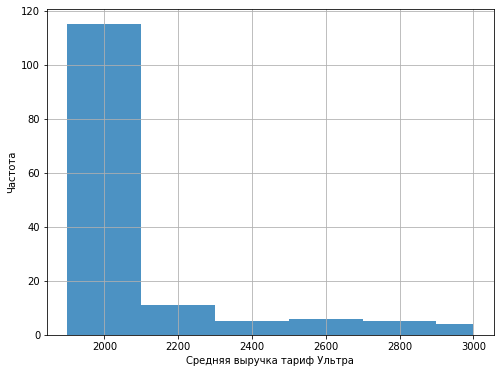

In [144]:
tariff_ultra_group['revenue'].hist(bins = [1900 , 2100, 2300, 2500, 2700, 2900, 3000], alpha = 0.8, figsize = (8, 6))
plt.xlabel('Средняя выручка тариф Ультра')
plt.ylabel('Частота')
plt.show()

Распределение на обоих гистограммах с явным смещением вправо. Проверим медианами:

In [145]:
display(tariff_smart_group['revenue'].median())

1176.4

In [146]:
display(tariff_ultra_group['revenue'].median())

1950.0

В обоих наборах данных есть смещение и достаточно заметное.

**Вывод**

В данном разделе мы посчитали среднее, дисперсию и стандартное отклонение для четырех параметров определяющий тариф (продолжительность разговоров, количество интернета, количество сообщений и выручки). Анализ показал, что одни данные менее однородные, чем другие. Степень однородности мы определяли по стандартному отклонению. Также мы посмотрели распределение данных и анализ показал, что кроме количества интернет трафика в тарифе Смарт, все остальные наборы распределены не равномерно, а со скошенностью.

## Проверка гипотез

В нашем распоряжении есть выборка из базы данных сотового оператора за 2018г. и есть две гипотезы:
- средняя выручка пользователей тарифов "Смарт" и "Ультра" различаются
- средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов

Нам нужно, на основании случайной выборки, оценить генеральную совокупность. Каждую гипотезу мы будем рассматривать отдельно. И для начала сформулируем нулевые гипотезы. 


Нулевая гипотеза формируется так, чтобы в ней был знак равенства и таким образом нулевая гипотеза для первого случая будет звучать как:
- средняя выручка в обоих тарифах равна

а для второго случая:
- средняя выручка пользователей Москвы равна средней выручке пользователей других регионов

Для того чтобы определить, твергать нулевую гипотезу или нет, задают критическое значение значимости. В нашем случае (в случае проверки обеих гипотез) уровень значимости (p-value)-это вероятность того, среднее одной выборки окажется далеко от среднего другой выборки. Другими словами, если наблюдаемое в выборке значение  меньше порогового уровня значимости, то вероятность такого значения при верной нулевой гипотезе признается слишком малым и есть основание отвергнуть нулевую гипотезу.

Приступим к проверке гипотез.

### Гипотеза о том, что выручка пользователей тарифов Смарт и Ультра различаются

Как было сказано ранее, чтобы проверить гипотезу нужно проверить нулевую гипотезу. В этом случае в качестве нулевой гипотезы было сделано предположение, что средняя выручка по обоим тарифам равна.

Для проверки гипотезы о равенстве двух генеральных совокупностей по взятым из них выборкам, применяется метод scipy.stats.ttest_ind(). В качестве порогового значения значимости установим 5%. При этом мы знаем, что выборки у нас не равны, поэтому укажем параметр equai_var = False и тогда дисперсия по каждой выборке будет расчитываться отдельно.

In [147]:
alpha = .05 # пороговое значение стратистической значимости

In [148]:
results_ultra_smart = st.ttest_ind(tariff_smart_group['revenue'], tariff_ultra_group['revenue'], equal_var = False) #сравниваем получившееся p-значение с заданным уровнем статистической значимости
display('p-значение:', results_ultra_smart.pvalue) #выведим на экран получившеся p-значение
if results_ultra_smart.pvalue < alpha: #сравниваем получившееся p-значение с заданным уровнем статистической значимости
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось опровергнуть нулевую гипотезу')

'p-значение:'

7.247981687409e-60

'Отвергаем нулевую гипотезу'

Уровень значимости оказался ниже порогового значения. Что говорит о том, что вероятность того, что средние значения генеральных совокупностей равны ниже 5%.  

Помним о том, что никакие эксперементальные данные не подтвердят какую-либо гипотезу. При проверке нашей нулевой гипотезы можно сказать, что полученные данные не противорячат ей, но считаются достаточно маловероятными.

Таким образом перевес находится на стороне альтернативной гипотезы, говорящей о том, что выручка по тарифам разная.

### Гипотеза о том, что выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Аналогично, как и при проверке предыдущей гипотезы применим метод scipy.stats.ttest_ind(). В качестве порогового значения значимости установим 5%. При этом мы предполагаем, что выборки у нас не равны, поэтому укажем параметр equai_var = False и тогда дисперсия по каждой выборке будет расчитываться отдельно.

Проверять будем нулевую гипотезу о том, что средняя выручка по Москве равна средней выручке в других регионах

Но для начала нам нужно объединить данные по тарифам для Москви и остальных регионов. Сделаем мы это следующим образом: с помощью логический индексации выделим в каждом тарифе строки с Москвой и сораним их в пересенной, а в другой переменной сохраним остальные регионы. Сделаем сводные таблицы по идентификатору пользователя, без разделения на месяцы и посчитаем среднее по выручке.

In [149]:
tariff_smart_moscow = tariff_smart.loc[tariff_smart['city']== 'Москва'] # сохраняем в переменную только строки соответствующие условию

In [150]:
display(tariff_smart_moscow.head())

,user_id,city,tariff,month,duration,mb_used,messages,gb_used,revenue
8,1001,Москва,smart,11.0,430.0,18429.34,0.0,18,1150.0
9,1001,Москва,smart,12.0,414.0,14036.66,0.0,14,550.0
53,1007,Москва,smart,4.0,198.0,8022.76,11.0,8,550.0
54,1007,Москва,smart,5.0,480.0,17687.27,39.0,18,1150.0
55,1007,Москва,smart,6.0,545.0,13654.52,26.0,14,685.0


In [151]:
tariff_smart_moscow = tariff_smart_moscow.pivot_table(index = 'user_id', values = 'revenue', aggfunc = 'mean') # делаем сводную таблицу и расчитываем средние значения и результат округляем до сотых

In [152]:
tariff_ultra_moscow = tariff_ultra.loc[tariff_ultra['city']== 'Москва']  # сохраняем в переменную только строки соответствующие условию

In [153]:
tariff_ultra_moscow = tariff_ultra_moscow.pivot_table(index = 'user_id', values = 'revenue', aggfunc = 'mean') # делаем сводную таблицу и расчитываем средние значения и результат округляем до сотых

In [154]:
tariff_smart_other = tariff_smart.loc[tariff_smart['city']!= 'Москва'] # сохраняем в переменную только строки соответствующие условию

In [155]:
tariff_smart_other = tariff_smart_other.pivot_table(index = 'user_id', values = 'revenue', aggfunc = 'mean') # делаем сводную таблицу и расчитываем средние значения, результат округляем до сотых

In [156]:
tariff_ultra_other = tariff_ultra.loc[tariff_ultra['city']!= 'Москва']  # сохраняем в переменную только строки соответствующие условию

In [157]:
tariff_ultra_other = tariff_ultra_other.pivot_table(index = 'user_id', values = 'revenue', aggfunc = 'mean') # делаем сводную таблицу и расчитываем средние значения и результат округляем до сотых

Далее объединим данные данные так, чтобы в одной выборке у нас были только данные по Москве, а во второй все остальные регионы, без разделения на тарифы. Чтобы какие-то значения не пропали используем метод merge()с параметром how='outer'

In [158]:
tariff_moscow = pd.merge(tariff_smart_moscow, tariff_ultra_moscow, on = 'user_id', how='outer') 

In [159]:
tariff_other = pd.merge(tariff_smart_other, tariff_ultra_other, on = 'user_id', how='outer')

Заменим пропукси на 0 и создадим столбец, который среднюю выручку по всем пользователям региона.

In [160]:
tariff_moscow = tariff_moscow.fillna(0)
tariff_other = tariff_other.fillna(0)

In [161]:
tariff_moscow['revenue_moscow'] = tariff_moscow['revenue_x']+tariff_moscow['revenue_y']

In [162]:
tariff_other['revenue_other'] = tariff_other['revenue_x']+tariff_other['revenue_y']

На основе полученных данных проверяем нашу нулевую гипотезу.

In [163]:
alpha = .05
results_moscow_other = st.ttest_ind(tariff_moscow['revenue_moscow'], tariff_other['revenue_other'], equal_var = False) #сравниваем получившееся p-значение с заданным уровнем статистической значимости
display('p-значение:', results_moscow_other.pvalue) #выведим на экран получившеся p-значение
if results_moscow_other.pvalue < alpha: #сравниваем получившееся p-значение с заданным уровнем статистической значимости
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось опровергнуть нулевую гипотезу')

'p-значение:'

0.3557950151396214

'Не получилось опровергнуть нулевую гипотезу'

Статистическая значимость выше порогового значения. Оснований отвергать нулевую гипотезу нет. Полученные данные не противоречат нулевой гипотезе.

У нас нет оснований утверждать, что средняя выручка по Москве и средняя выручка по регионам равна, но такая вероятность есть.

**Вывод**

Мы проверили две гипотезы. И в первом случае, утверждение сделанное в нулевой гипотезе о равенстве средних выручек у обоих тарифов, считается маловероятным. А в случае со второй гипотезой, можно сказать, что есть вероятность того, что средняя выручка в Москве равна средней выручке в других регионах.
Для того, чтобы получить более достоверные сведенья, считаю необходимым провести исследования еще на нескольких случайных выборках, а полученные результаты сравнить и тогда уже делать вывод.

## Общий вывод

В данной работе мы проводили исследование для коммерческого отдела компании "Мегалайн", чтобы определить какой тариф лучше.

На первом этапе мы получили первое представление о данных, обнаружили некоректные значения. Далее провели предобработку: заменили тип данных в столбцах с датами. Округлили данные по длительности разговора до минуты в большую сторону. Добавили столбец с номером месяца.

Затем мы сгруппировали данные по месяцам и пользователям и расчитали выручку по каждому пользователю в месяц. По сгруппированныым по месяцам данным провели перевод интернет трафика из мегабайт в гигабайты и округлили в большую сторону.

Во сремя анализа мы посчитали среднее, дисперсию и стандартное отклонение. Анализ показал, что одни данные менее однородные, чем другие. Степень однородности мы определяли по стандартному отклонению. Также мы посмотрели распределение данных и анализ показал, что кроме количества интернет трафика тарифа Смарт, все остальные наборы распределены не равномерно, а со скошенностью. 

В нашем распоряжении было две гипотезы: первая о том, что средние выручки по тарифам разные, а вторая о том что средняя выручка в Москве отличается от средней выручки в других регионах. Мы сделали две нулевые гипотезы о равенстве указанных средних. В первом случае, вероятность равенства двух выборочных средних ниже порогового значения статистической значимости, что есть основания полагать, что нулевая гипотеза ошибочна и скорее всего средние генеральных выборок не равны.

Во втором случае, вероятность равенства двух выборочных средних выше порогового значения статистической значимости, и есть основания полагать, что нулевая гипотеза верна и есть вероятность того что, средние генеральных выборок равны. Но говорить о том, что гипотеза доказана или опровегнута нет оснований. Мы можем только следать вывод о том, вероятно ли то, что утверждается в гипотезе или маловероятно.

На основании полученных данных можно сказать, что тариф Ультра приносит больше денег (судя по среднему), но количество его пользователей меньше.

В нашей проверке гипотез вижу некоторую проблему: изначально мы взяли достаточно большую выборку по которой достаточно хорошо можно было бы судить о генеральной совокупности, но потом мы начали ее делить. Сначала в соответствии с тарифом, а потом разделяли по регионам. Выборки у ас полличились не равные между собой, например впр  проверке гипотезы о неравенстве выручек по Москве и другим регионам было 99 пользователей из Москви и 401 из других регионов. Считаю, что погрешность в наших расчетах может быть достаточно велика и проверка гипотез требует проведения еще нескольких исследований. При этом для большей информативности, лучше разделить генеральную совокупность на два тарифа до формирования случайных выборок, и на два региона, а потом уже делать выборки для анализа. Выборки лучше делать одинакового размера, пусть не очень большого количества, но несколько и равные по размеру. 